In [1]:


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score



In [5]:
day_df = pd.read_csv("sample_data/day.csv")
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Renaming columns names to more readable names
day_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'yr':'year'},inplace=True)

day_df.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
day_df['season'] = day_df.season.astype('category')
day_df['is_holiday'] = day_df.is_holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')
day_df['is_workingday'] = day_df.is_workingday.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['year'] = day_df.year.astype('category')


In [9]:
day_df.head()

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,2019-12-28,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,2019-12-29,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,2019-12-30,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [12]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

[Text(0.5, 1.0, 'Season wise monthly distribution of counts')]

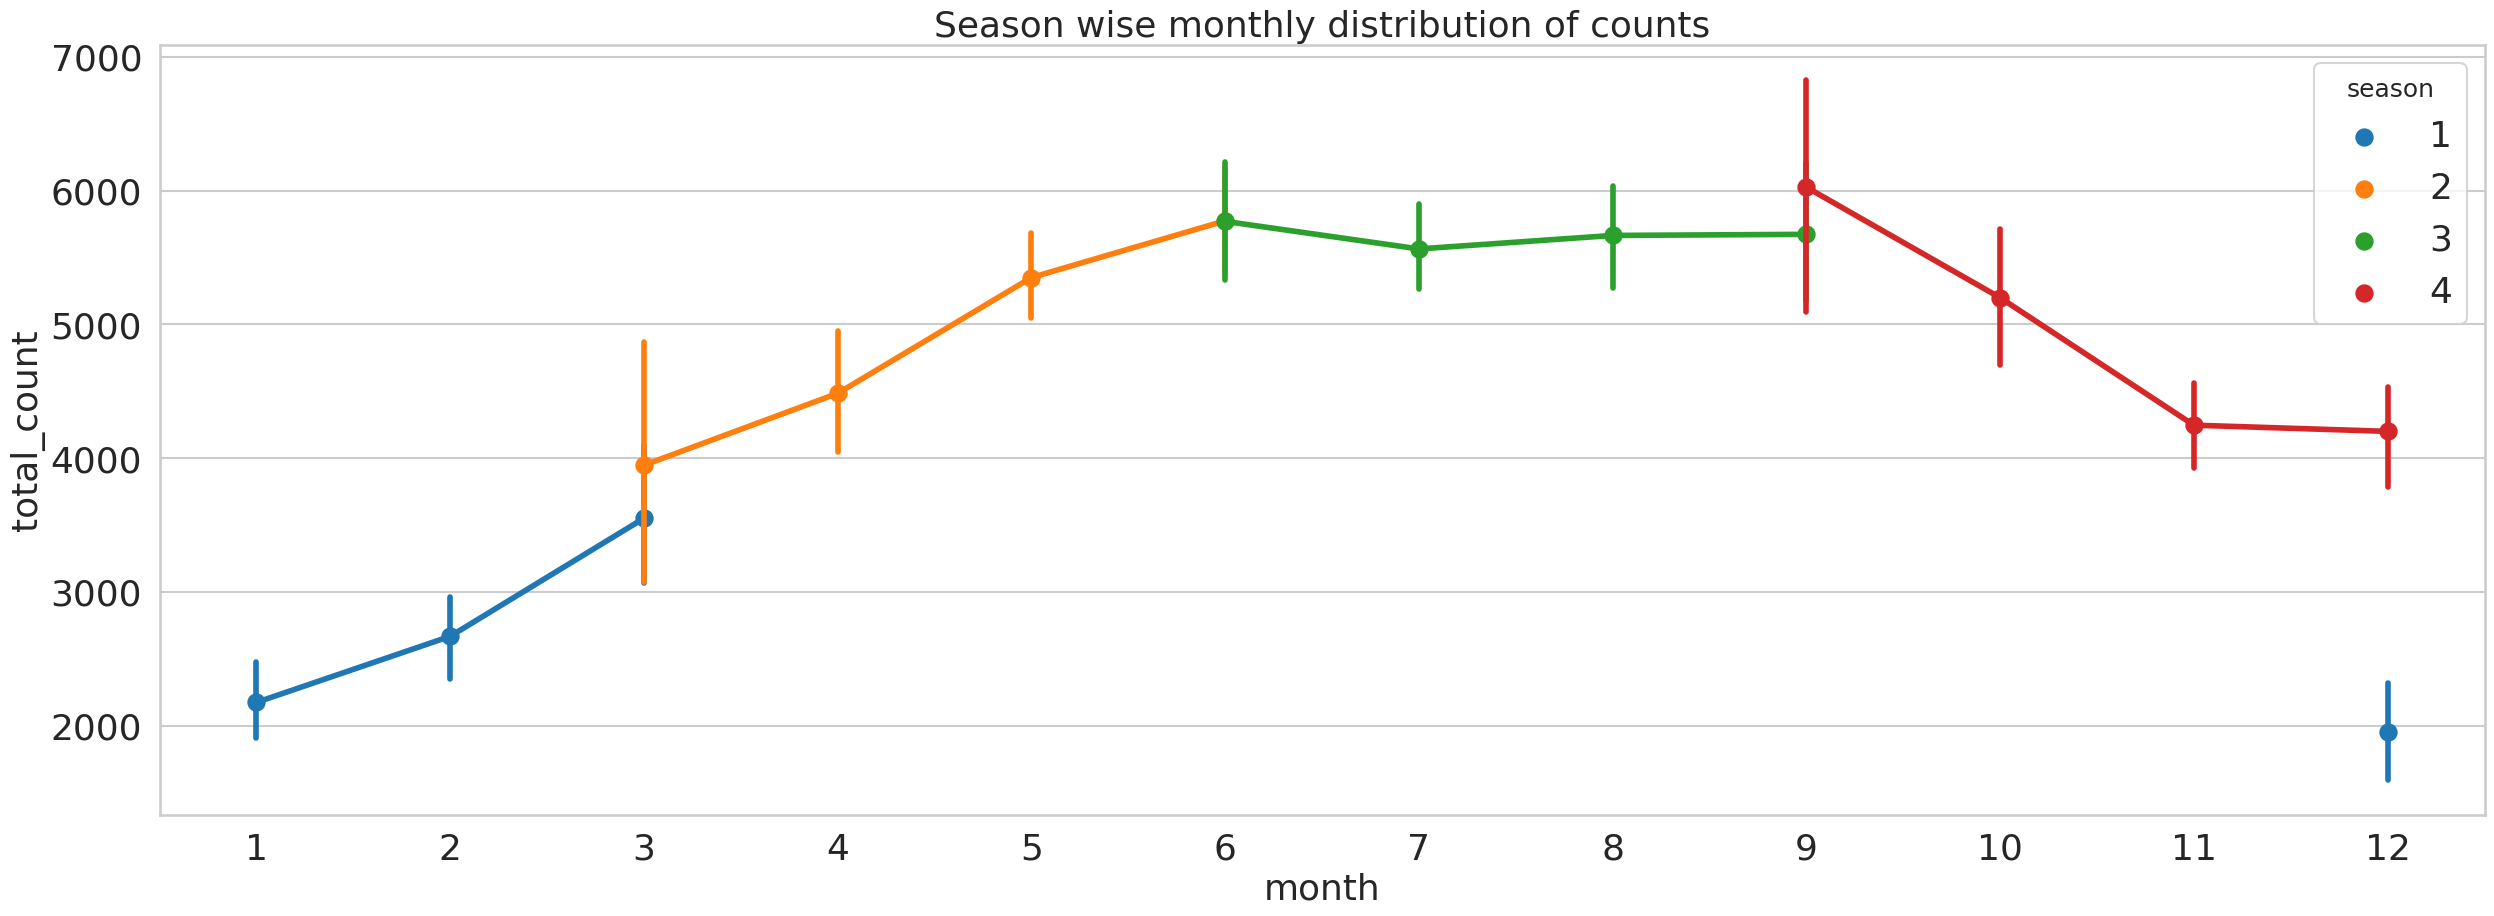

In [16]:
fig,ax = plt.subplots()
sns.pointplot(data=day_df[['month',
                           'total_count',
                           'season']],
              x='month',
              y='total_count',
              hue='season',
              ax=ax)
ax.set(title="Season wise monthly distribution of counts")
## here month 6-9 the bike sale is high i.e on fall season

[Text(0.5, 1.0, 'Weekday wise monthly distribution of counts')]

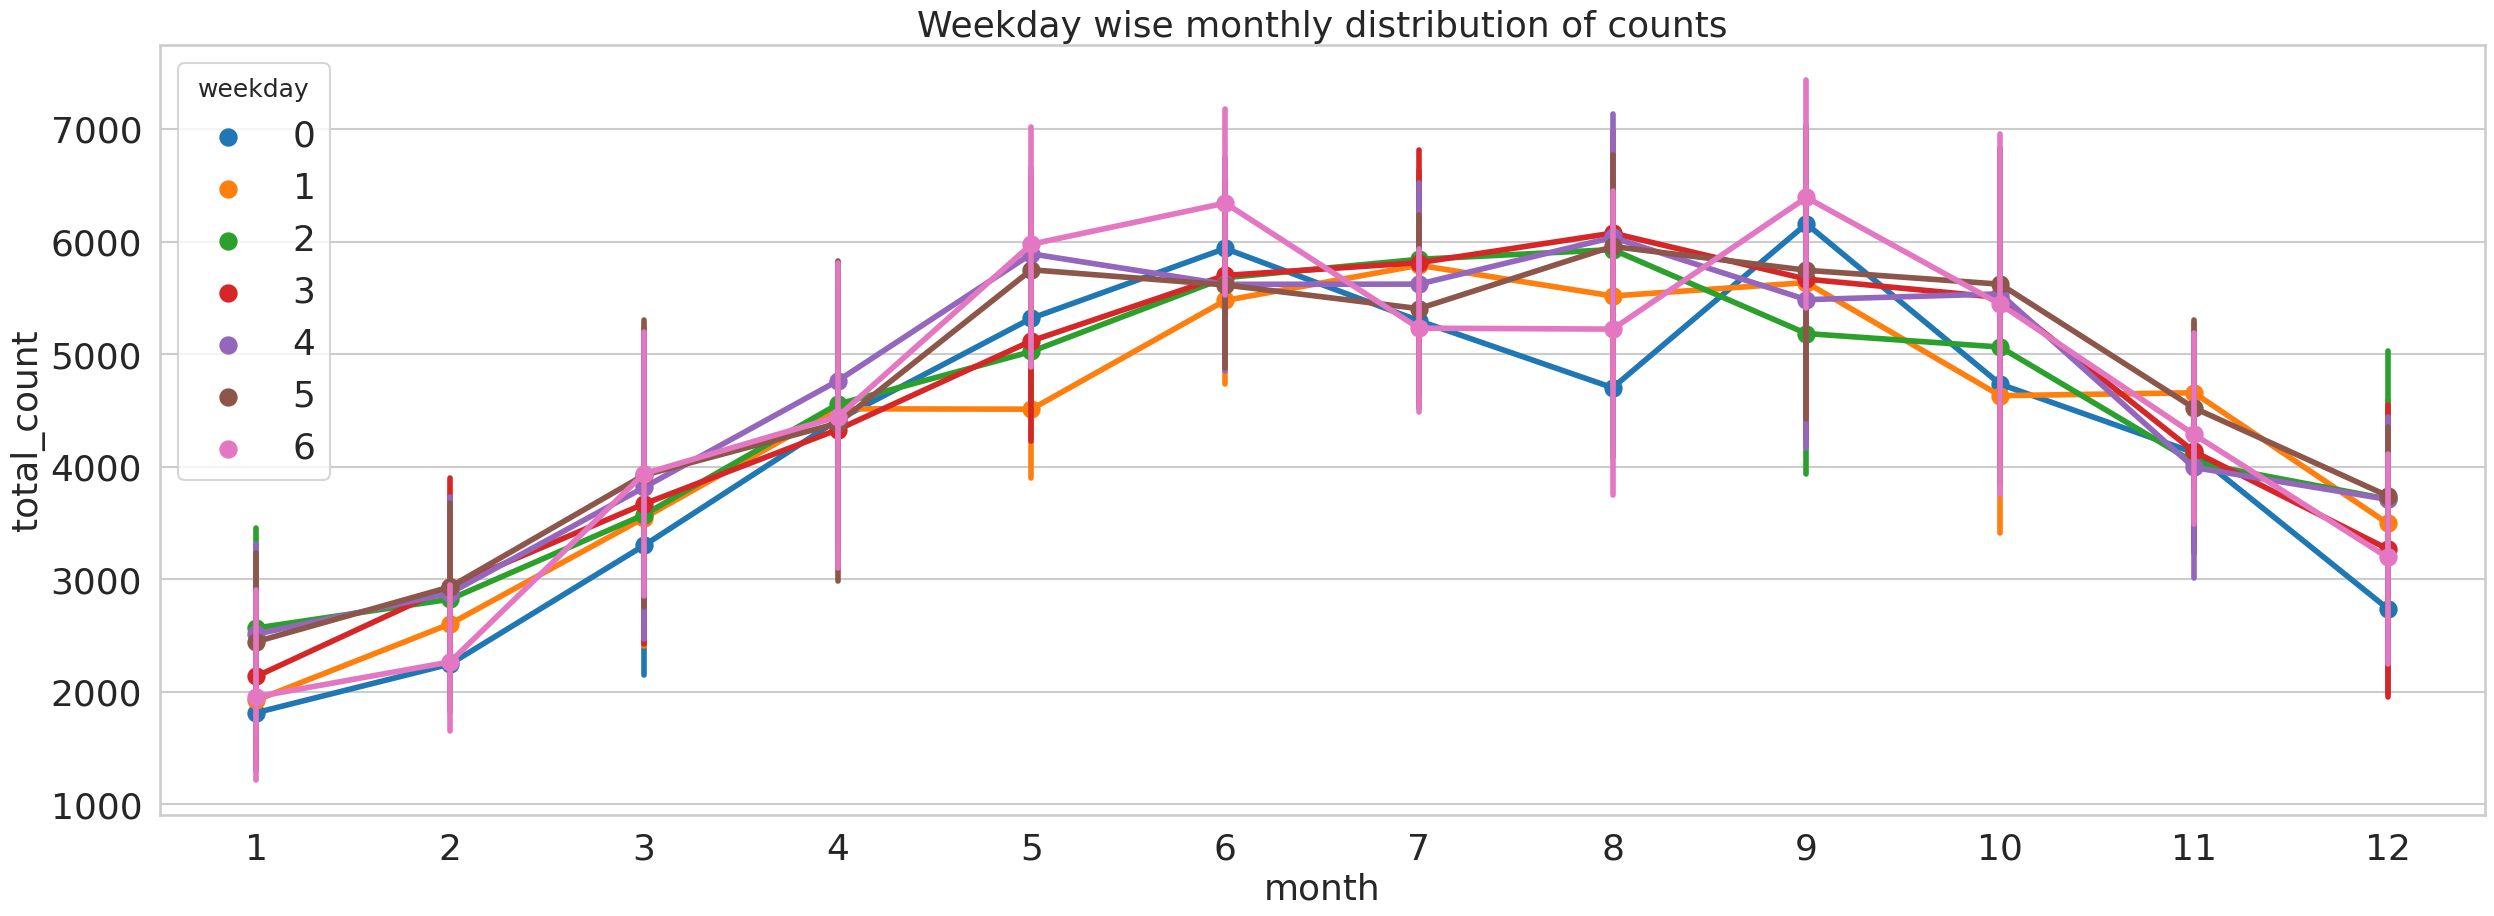

In [17]:
fig,ax = plt.subplots()
sns.pointplot(data=day_df[['month',
                           'total_count',
                           'weekday']],
              x='month',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise monthly distribution of counts")

[Text(0.5, 1.0, 'Year distribution of counts')]

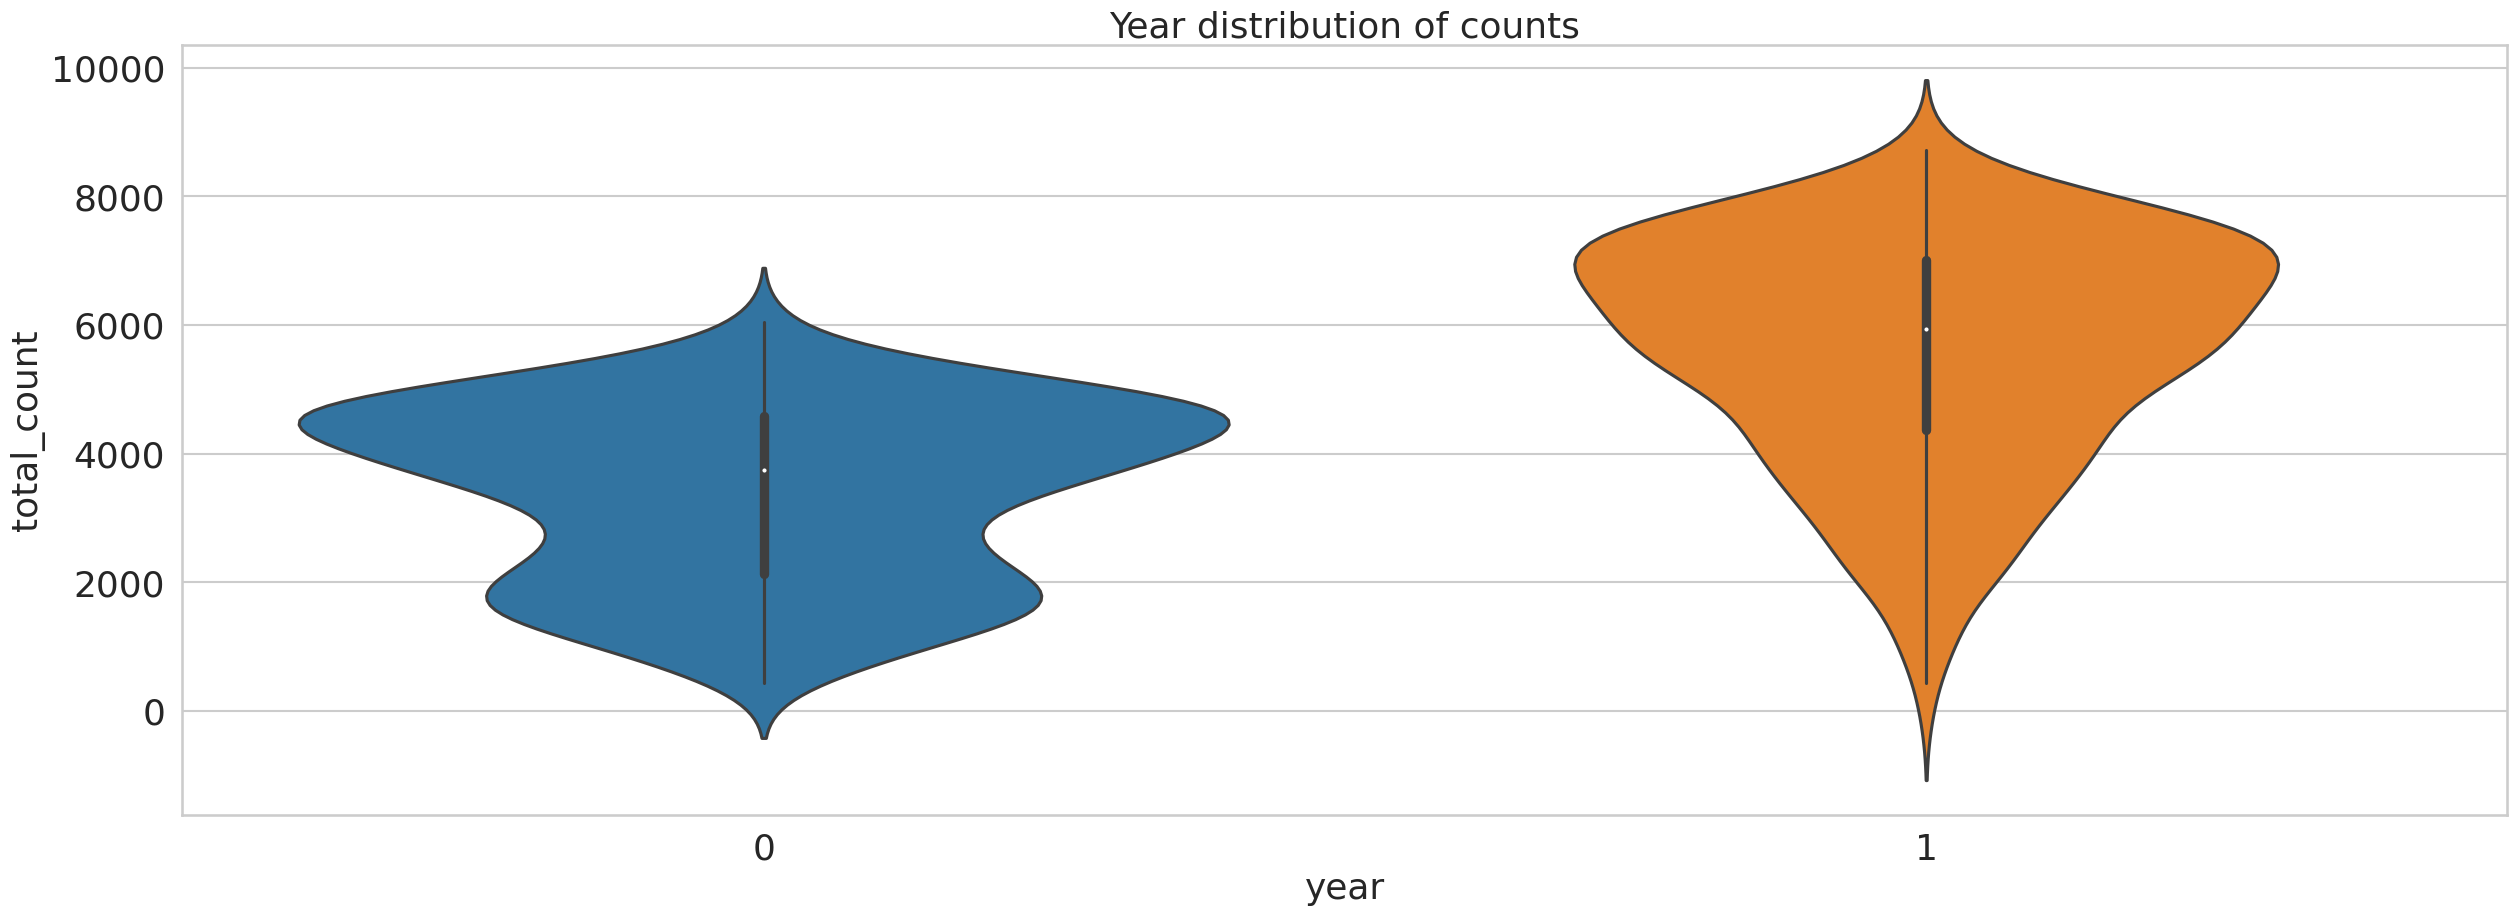

In [18]:
fig,ax = plt.subplots()
sns.violinplot(data=day_df[['year',
                           'total_count']],
              x='year',
              y='total_count',
              ax=ax)
ax.set(title="Year distribution of counts")

<Axes: >

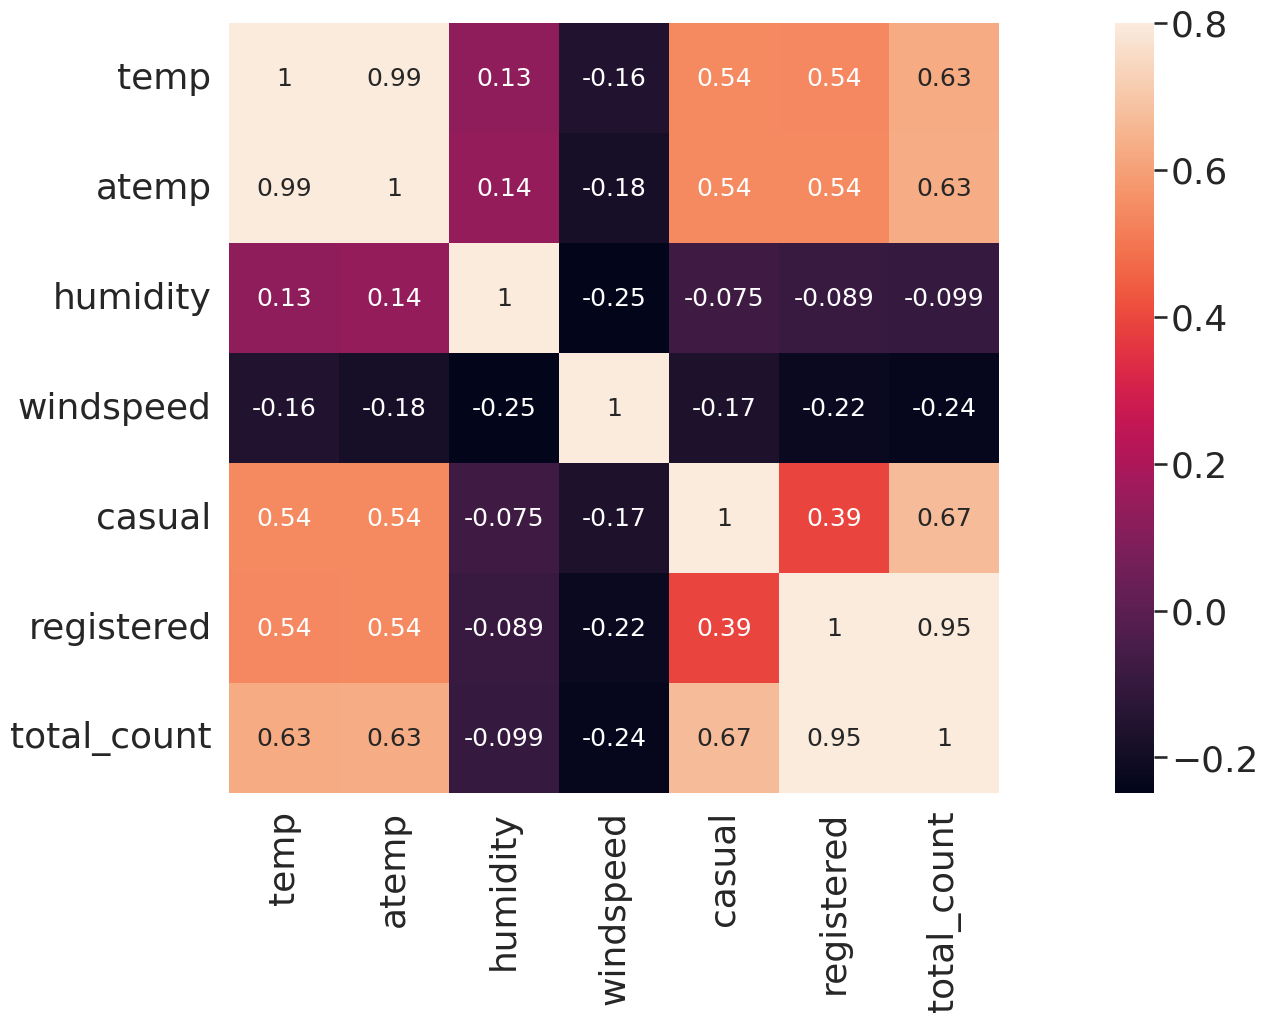

In [19]:
corrMatt = day_df[['temp',
                    'atemp',
                    'humidity',
                    'windspeed',
                    'casual',
                    'registered',
                    'total_count']].corr()

fig,ax = plt.subplots()
sns.heatmap(corrMatt,
            vmax=.8,
            square=True,
            annot=True,
            ax=ax)
# here the correlation is high total_count with atemp,registered,temp and windspeed correlation is low with every attribute

[Text(0.5, 1.0, 'Relation between humidity and total_count')]

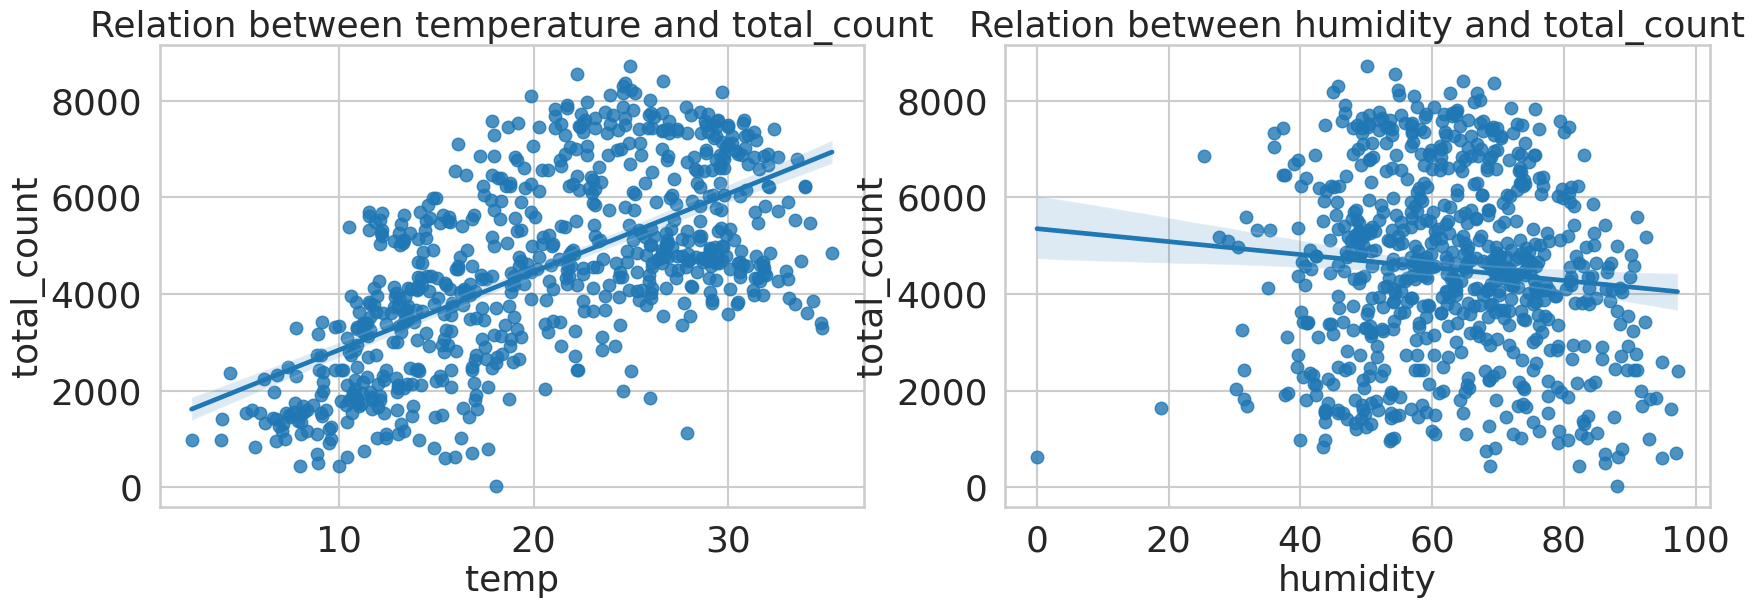

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=day_df['temp'], y=day_df['total_count'], ax=ax1)
ax1.set(title="Relation between temperature and total_count")
sns.regplot(x=day_df['humidity'], y=day_df['total_count'], ax=ax2)
ax2.set(title="Relation between humidity and total_count")
#With the increase in temperature, the number of users increases.

# When the humidity increases the number of users decreases.

In [22]:
pd.get_dummies(day_df['season'], prefix='season', drop_first=True)
  # Display of the dataset of the seasons, if specific season is present in the data it will assign 1 in the corresponding column and the other columns will be 0.

  # The prefix is to include the word in the column name, in this case it's for better understanding

  # Drop_first drops the first column, so if the all the no. are 0 in the remaining three columns, that means season 1 is present.



,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [24]:
df_oh = day_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

cols = ['year','season','month','is_holiday','weekday','is_workingday','weather_condition']

for col in cols:
    df_oh = one_hot_encoding(df_oh, col)
df_oh.head()
#New data frame after hot one encoding the data, adding new features

#With the additional features added this will increase the training process time as well as the accuracy



,rec_id,datetime,temp,atemp,humidity,windspeed,casual,registered,total_count,year_1,...,is_holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,is_workingday_1,weather_condition_2,weather_condition_3
0,1,2018-01-01,14.110847,18.18125,80.5833,10.749882,331,654,985,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2018-02-01,14.902598,17.68695,69.6087,16.652113,131,670,801,0,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,...,0,1,0,0,0,0,0,1,0,0
3,4,2018-04-01,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,...,0,0,1,0,0,0,0,1,0,0
4,5,2018-05-01,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,...,0,0,0,1,0,0,0,1,0,0


In [58]:
y = df_oh['total_count']
X = df_oh.drop(columns=['atemp', 'windspeed', 'casual', 'registered', 'total_count','datetime'], axis=1)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
models = [LinearRegression()]

In [44]:
X=X.drop([314,315,316,344,345,346,648,649,650,679,680,681,709,710,711])
y=y.drop([314,315,316,344,345,346,648,649,650,679,680,681,709,710,711])

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [60]:
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8158062935162427


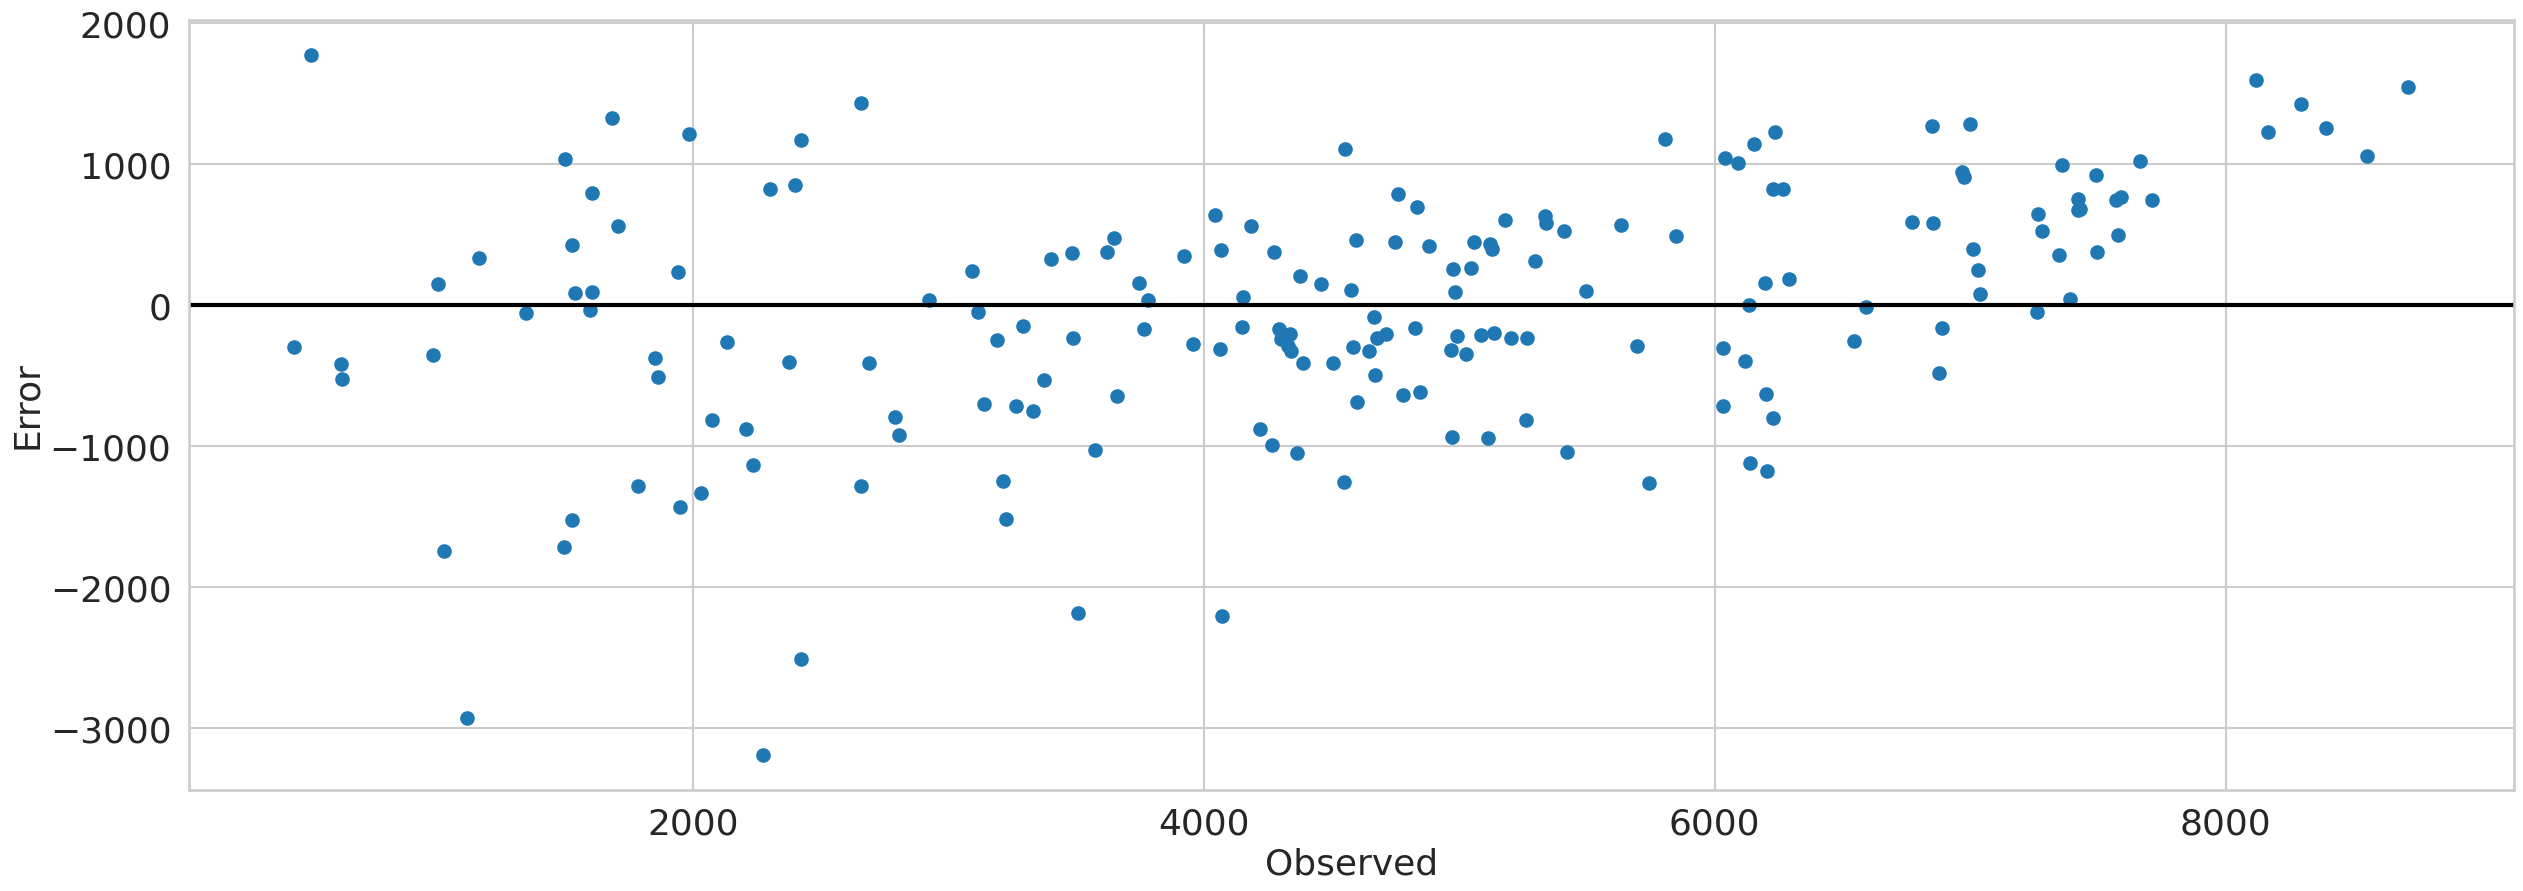

In [61]:
y_pred = regr.predict(X_test)
error = y_test - y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, error)
ax.axhline(lw=3, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Error')
plt.show()
#Error Difference of Actual & Predicted Values